In [21]:
#imports
import json
import pandas as pd
import datetime
from haversine import haversine, Unit
import challenge        

In [22]:
#call script
with open('api_techician_response_data.json') as f:
    df = pd.DataFrame(challenge.data_prep(json.load(f)))
    flagged = challenge.calc_distance(df)

In [23]:
#overall dataframe
df

bearing        lat         lon  dist_to_Tech 3  \
id datetime            name                                                     
0  2020-06-13 16:00:00 Tech 3      0.0  32.673694 -115.606392        0.000000   
                       Tech 1     87.0  32.679084 -115.585908     6590.234618   
                       Tech 2    270.0  32.676567 -115.590877     4878.341867   
1  2020-06-13 16:01:00 Tech 3    181.0  32.673507 -115.606424        0.000000   
                       Tech 1     90.0  32.678043 -115.585938     6504.994084   
                       Tech 2    181.0  32.676527 -115.590842     4910.258841   
2  2020-06-13 16:02:00 Tech 3    180.0  32.673059 -115.606424        0.000000   
                       Tech 1    271.0  32.678043 -115.586166     6481.265985   
                       Tech 2    182.0  32.676527 -115.590862     4943.595400   
3  2020-06-13 16:03:00 Tech 3     90.0  32.673012 -115.606415        0.000000   
                       Tech 1    273.0  32.678058 -115.586948     6254.961193   
                       Tech 2    182.0  32.676369 -115.590797     4949.889475   
5  2020-06-13 16:04:00 Tech 3     87.0  32.673016 -115.606236        0.000000   
                       Tech 1     92.0  32.677840 -115.586953     6177.439794   
                       Tech 2    181.0  32.676012 -115.590802     4863.926582   
6  2020-06-13 16:05:00 Tech 3      2.0  32.673185 -115.606238        0.000000   
                       Tech 1     91.0  32.677573 -115.586953     6134.536715   
                       Tech 2    180.0  32.675680 -115.590807     4825.233426   
7  2020-06-13 16:06:00 Tech 3      3.0  32.673359 -115.606243        0.000000   
                       Tech 1     94.0  32.677310 -115.586958     6094.902382   
                       Tech 2    193.0  32.675651 -115.590817     4810.245251   
8  2020-06-13 16:07:00 Tech 3      2.0  32.673532 -115.606242        0.000000   
                       Tech 1     88.0  32.676988 -115.586963     6052.950900   
                       Tech 2    187.0  32.675596 -115.590807     4799.213807   
9  2020-06-13 16:08:00 Tech 3      0.0  32.673592 -115.606300        0.000000   
                       Tech 1     91.0  32.676587 -115.586958     6039.188713   
                       Tech 2    188.0  32.675353 -115.590817     4797.784313   
10 2020-06-13 16:09:00 Tech 3    288.0  32.673647 -115.606380        0.000000   
                       Tech 1     90.0  32.676577 -115.587305     5954.307553   
                       Tech 2     90.0  32.675140 -115.590807     4813.049180   
11 2020-06-13 16:10:00 Tech 3    290.0  32.673677 -115.606408        0.000000   
                       Tech 1    271.0  32.676562 -115.587558     5883.338148   
                       Tech 2     91.0  32.675126 -115.589713     5153.904224   
12 2020-06-13 16:11:00 Tech 3      0.0  32.673721 -115.606333        0.000000   
                       Tech 1    273.0  32.676552 -115.587667     5824.292538   
                       Tech 2     93.0  32.675121 -115.588955     5360.886361   
13 2020-06-13 16:12:00 Tech 3     82.0  32.673727 -115.606253        0.000000   
                       Tech 1    272.0  32.676572 -115.587721     5784.654079   
                       Tech 2     94.0  32.675111 -115.587994     5629.840429   
14 2020-06-13 16:13:00 Tech 3     91.0  32.673735 -115.605822        0.000000   
                       Tech 1     85.0  32.676562 -115.587756     5642.873260   
                       Tech 2     90.0  32.675111 -115.586983     5806.901384   
15 2020-06-13 16:14:00 Tech 3     90.0  32.673734 -115.605277        0.000000   
                       Tech 1     87.0  32.676562 -115.587781     5471.010045   
                       Tech 2    270.0  32.675131 -115.587686     5425.764120   
16 2020-06-13 16:16:00 Tech 3     91.0  32.673730 -115.604789        0.000000   
   2020-06-13 16:15:00 Tech 1     90.0  32.676532 -115.587746        0.000000   
                       Tech 2      0.0  32.675819 -115.587686 

In [24]:
flagged

point_a      lat_a       lon_a point_b      lat_b  \
id datetime                                                                
11 2020-06-13 16:10:00  Tech 1  32.676562 -115.587558  Tech 2  32.675126   
   2020-06-13 16:10:00  Tech 2  32.675126 -115.589713  Tech 1  32.676562   
12 2020-06-13 16:11:00  Tech 1  32.676552 -115.587667  Tech 2  32.675121   
   2020-06-13 16:11:00  Tech 2  32.675121 -115.588955  Tech 1  32.676552   
13 2020-06-13 16:12:00  Tech 1  32.676572 -115.587721  Tech 2  32.675111   
   2020-06-13 16:12:00  Tech 2  32.675111 -115.587994  Tech 1  32.676572   
14 2020-06-13 16:13:00  Tech 1  32.676562 -115.587756  Tech 2  32.675111   
   2020-06-13 16:13:00  Tech 2  32.675111 -115.586983  Tech 1  32.676562   
15 2020-06-13 16:14:00  Tech 1  32.676562 -115.587781  Tech 2  32.675131   
   2020-06-13 16:14:00  Tech 2  32.675131 -115.587686  Tech 1  32.676562   
16 2020-06-13 16:15:00  Tech 1  32.676532 -115.587746  Tech 2  32.675819   
   2020-06-13 16:15:00  Tech 2  32.675819 -115.587686  Tech 1  32.676532   

                             lon_b    distance  
id datetime                                     
11 2020-06-13 16:10:00 -115.589713  844.119815  
   2020-06-13 16:10:00 -115.587558  844.119815  
12 2020-06-13 16:11:00 -115.588955  655.137273  
   2020-06-13 16:11:00 -115.587667  655.137273  
13 2020-06-13 16:12:00 -115.587994  539.649025  
   2020-06-13 16:12:00 -115.587721  539.649025  
14 2020-06-13 16:13:00 -115.586983  580.253682  
   2020-06-13 16:13:00 -115.587756  580.253682  
15 2020-06-13 16:14:00 -115.587686  523.079881  
   2020-06-13 16:14:00 -115.587781  523.079881  
16 2020-06-13 16:15:00 -115.587686  260.876216  
   2020-06-13 16:15:00 -115.587746  260.876216

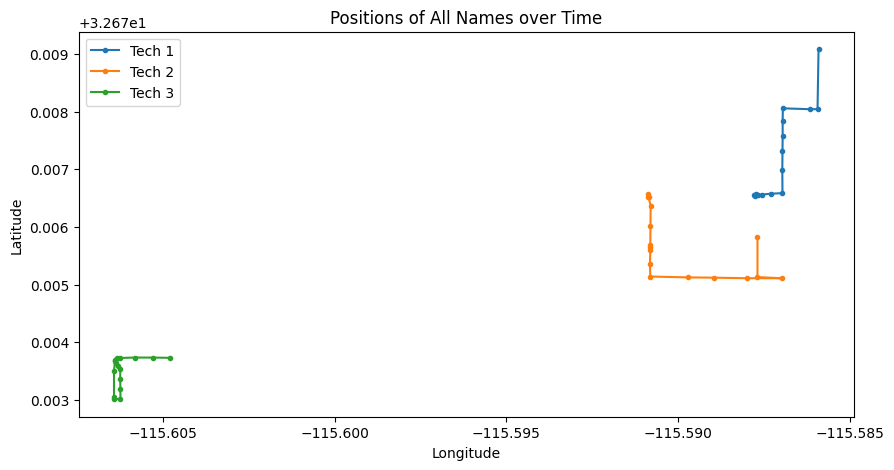

In [25]:
# visualizing change in position

import matplotlib.pyplot as plt

# Group the dataframe by name
grouped_df = df.groupby('name')

# Create a plot of all names' positions over time
fig2, ax2 = plt.subplots(figsize=(10, 5))
for name, group in grouped_df:
    ax2.plot(group['lon'], group['lat'], label=name, marker='o', markersize=3)
ax2.set_title('Positions of All Names over Time')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.legend()

plt.show()


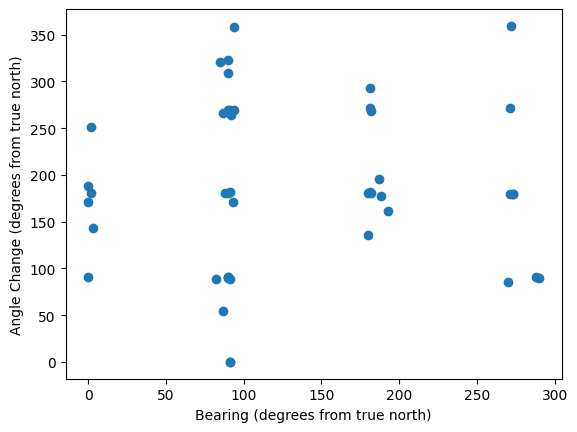

In [26]:
# visualizing relationship between angle from change in distance and bearing

import math

def angle_change(lat1, lon1, lat2, lon2):
    dlon = lon2 - lon1
    y = math.sin(math.radians(dlon)) * math.cos(math.radians(lat2))
    x = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) \
        - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dlon))
    bearing = math.degrees(math.atan2(y, x))
    if bearing < 0:
        bearing += 360
    angle_change = (bearing - 360) % 360
    return angle_change

# Calculate the change in angle for each technology
angles = [None, None, None]
for name, group in df.groupby('name'):
    for i in range(1, len(group)):
        prev_row = group.iloc[i-1]
        curr_row = group.iloc[i]
        angle = angle_change(prev_row['lat'], prev_row['lon'], curr_row['lat'], curr_row['lon']) 
        angles.append(angle)

#plot
import matplotlib.pyplot as plt

plt.scatter(df['bearing'], angles)
plt.xlabel('Bearing (degrees from true north)')
plt.ylabel('Angle Change (degrees from true north)')
plt.show()